## Lab 3: Classification (Mushroom)
Download the df and create a well-structured notebook with Markdown headings and notes that describes your process as you:

1. Load the df
2. Perform some lightweight exploratory df analysis
3. Create train/test splits from the df
4. Fit at least 5 (but hopefully more) different classification model forms to the train split
5. Score all fitted models on your test split (using at least an F1 score)
6. Record the best performing regression model in your model selection

Models to try:
kNN
Naive Bayes
SVMs
Logistic Regression
DecisionTree
RandomForrest
GradientBoosting
AdaBoost
Multilayer Perceptron
Voting Ensemble
Stacking Ensemble
Ridge Classifier
LASSO Classifier
Make sure you do at least a little bit of hyper parameter tuning! 

*Prereq download https://archive.ics.uci.edu/static/public/73/mushroom.zip
and rename agaricus-lepiota.df to agaricus-lepiota.df.txt


### **Mushroom Dataset**

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

### Notebook Setup and Load Data

In [2]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import RidgeClassifier, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



In [3]:
#Read files from relative path. dfset needs to be in same directory as notebook
df = pd.read_csv('agaricus-lepiota.data')
with open('agaricus-lepiota.names', 'r') as file:
    file_contents = file.read()
print(file_contents)

1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 

In [3]:
df
#Missing headers, nothing to identify the df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Assign Column Names

In [4]:
#Couldn't find a clean way to pull attribute names directly from the names file. Was getting 32 or 49 values. 
df_file = 'agaricus-lepiota.data'
# Attribute names as mentioned in the .names file
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                'ring-type', 'spore-print-color', 'population', 'habitat']

# Load the df
df = pd.read_csv(df_file, header=None, names=column_names)

# Display the first few rows of the df
df.head()

#Dataset consists of 23 attributes, including the target variable class, which indicates the classification of the mushroom as edible or poisionous

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Exploratory Data Analysis (EDA)

In [5]:
#Perform some lightweight exploratory df analysis
df.shape

(8124, 23)

In [6]:
# Check the distribution of the target variable 'class'
class_distribution = df['class'].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 class
e    4208
p    3916
Name: count, dtype: int64


In [7]:
print("\nDataset Summary:\n")
df.describe()


Dataset Summary:



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148



Missing Values:
 class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


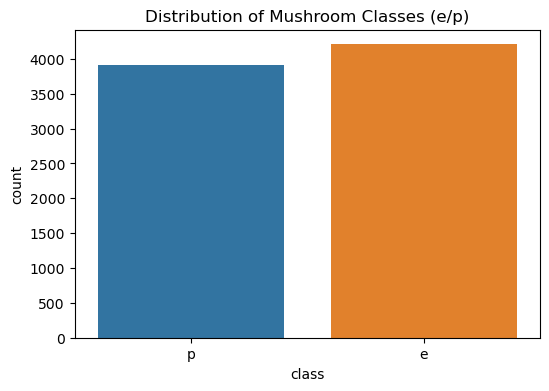

/var/folders/9z/b6wc91v92gx1kzz2tzdkhsvm0000gn/T/ipykernel_3540/1820178704.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)  # Adjust the font size as needed


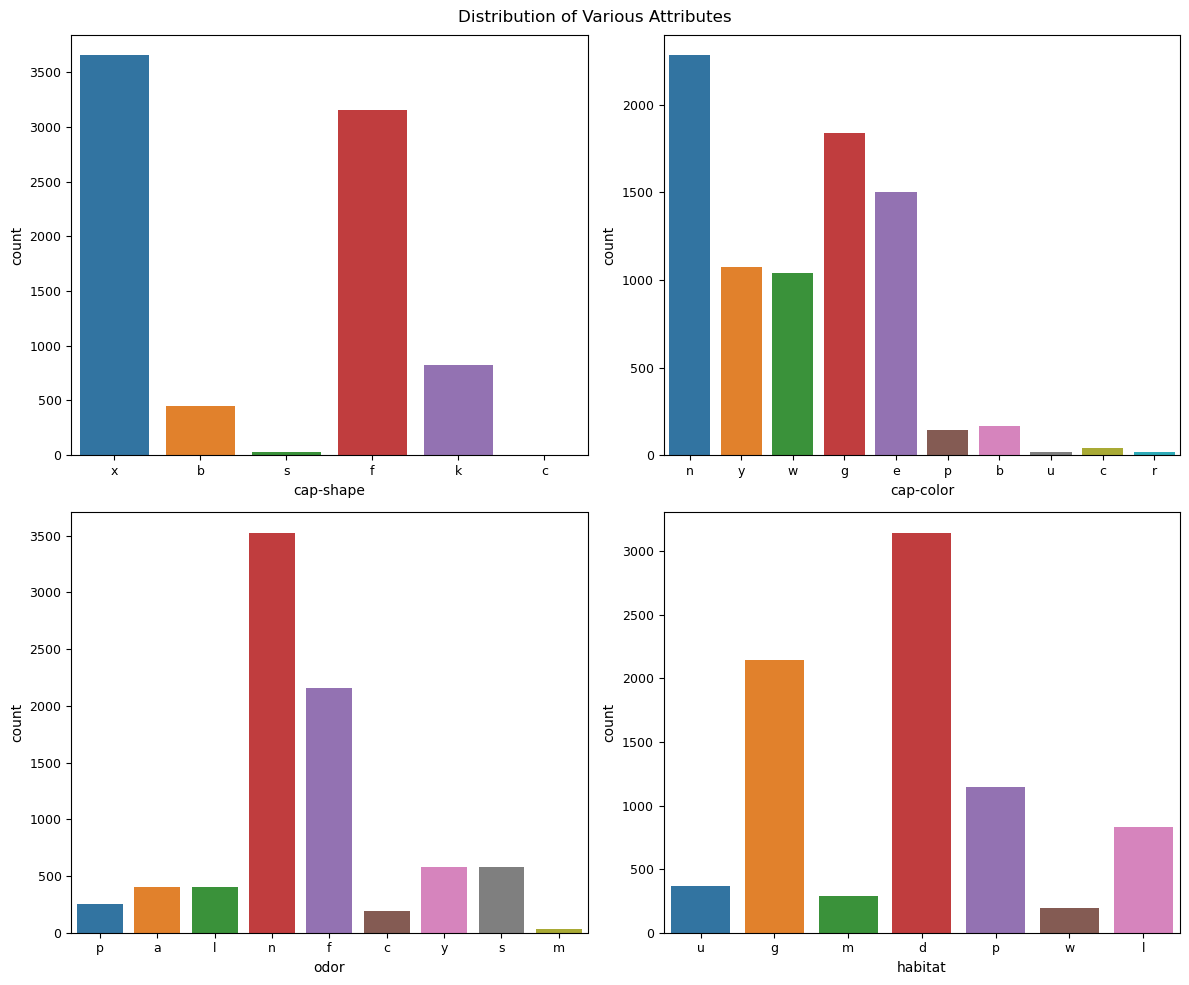

In [8]:
# Check for missing values (denoted by '?')
missing_values = df.isin(['?']).sum()
print("\nMissing Values:\n", missing_values)

# Visualize the distribution of the 'class'
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title('Distribution of Mushroom Classes (e/p)')
plt.show()

# Visualize the distribution of a few categorical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.countplot(x='cap-shape', data=df, ax=axes[0,0])
sns.countplot(x='cap-color', data=df, ax=axes[0,1])
sns.countplot(x='odor', data=df, ax=axes[1,0])
sns.countplot(x='habitat', data=df, ax=axes[1,1])

# Set the font size for x-axis and y-axis labels
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)  # Adjust the font size as needed
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)  # Adjust the font size as needed

fig.suptitle('Distribution of Various Attributes')
plt.tight_layout()
plt.show()

### Train/Test Split

In [9]:
# Map the class values to a binary format (edible=e, poisonous=p)
binary_class_map = {'e': 'edible', 'p': 'poisonous'}
df['class'] = df['class'].map(binary_class_map)

# Check the distribution of the updated target variable
updated_class_distribution = df['class'].value_counts(normalize=True)

# Create train/test splits
# Separate features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(updated_class_distribution)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

class
edible       0.517971
poisonous    0.482029
Name: proportion, dtype: float64
(5686, 22) (2438, 22) (5686,) (2438,)


<font size="2.5"><b><u>

Note on Results </font> </b></u>

<font size="2">

* **Class Distribution** : There's a balanced distribution between edible and poisonous classes 
    - edible = 0.517971
    - poisonous= 0.482029
* **Size of Training and Testing Sets:**
    - Train data used to train the model has 5686 samples and each sample has 22 attributes
    - Test data used to evaluate performance of the model has 2438 samples and each sample has 22 attributes)
* **Shape of Target Variables:**
    - Target variable for the training set (y_train_corrected) has 5,686 labels corresponding to the class (edible or poisonous) of each mushroom in the training set
    - Target variable for the testing set (y_test_corrected) has 2,438 labels, one for each mushroom in the test set
</font>

### Model Fitting

In [10]:
# Select the categorical columns from the training set 
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define OneHotEncoder to transform the categorical variables
one_hot_encoder = OneHotEncoder(sparse_output=False)

# Create a preprocessor object using ColumnTransformer to apply the OneHotEncoder to categorical features only
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # this will pass through other variables without transformation
)

In [11]:
# Define dictionary of models where each model is a pipeline comprising of preprocessing and classification steps
updated_models = {
    'LogisticRegression': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000, C=0.5, solver='liblinear'))]),
    'DecisionTree': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(max_depth=5, min_samples_split=4))]),
    'RandomForest': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5))]),
    'SVM': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(C=1, kernel='rbf'))]),
    'KNN': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier(n_neighbors=5, weights='uniform'))])
}

In [12]:
# Fit models and evaluate
updated_model_scores = {}
for name, model in updated_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    updated_model_scores[name] = f1_score(y_test, y_pred, average='weighted')

updated_model_scores

{'LogisticRegression': 0.9995898224087307,
 'DecisionTree': 0.9995898224087307,
 'RandomForest': 0.9917939005339479,
 'SVM': 1.0,
 'KNN': 1.0}

### Train-Test Split Performance Comparison (Cross-Validation)

In [13]:
# Select the categorical columns from the training set 
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define OneHotEncoder to transform the categorical variables
one_hot_encoder = OneHotEncoder(sparse_output=False)

# Create a preprocessor object using ColumnTransformer to apply the OneHotEncoder to categorical features only
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # this will pass through other variables without transformation
)

# Define dictionary of models where each model is a pipeline comprising of preprocessing and classification steps
updated_models = {
    'LogisticRegression': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000, C=0.5, solver='liblinear'))]),
    'DecisionTree': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(max_depth=5, min_samples_split=4))]),
    'RandomForest': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5))]),
    'SVM': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(C=1, kernel='rbf'))]),
    'KNN': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier(n_neighbors=5, weights='uniform'))])
}

# Fit models and evaluate
updated_model_scores = {}
for name, model in updated_models.items():

    # Train the model
    model.fit(X_train, y_train)
    # Predict and evaluate on the training set
    y_train_pred = model.predict(X_train)
    train_score = f1_score(y_train, y_train_pred, average='weighted')

    # Predict and evaluate on the test set
    y_test_pred = model.predict(X_test)
    test_score = f1_score(y_test, y_test_pred, average='weighted')

    # Store the scores
    updated_model_scores[name] = {
        'train_score': train_score,
        'test_score': test_score
    }

# Print the scores
for name, scores in updated_model_scores.items():
    print(f"{name} - Training score: {scores['train_score']:.3f}, Test score: {scores['test_score']:.3f}")


LogisticRegression - Training score: 1.000, Test score: 1.000
DecisionTree - Training score: 1.000, Test score: 1.000
RandomForest - Training score: 0.991, Test score: 0.989
SVM - Training score: 1.000, Test score: 1.000
KNN - Training score: 1.000, Test score: 1.000


### Adjust Hyperparameters Per Model

<font size="2.5">

Logistic Regression:
- C: Regularization strength.
- solver: Algorithm to use for optimization.

Decision Tree:
- max_depth: Maximum depth of the tree.
- min_samples_split: Minimum number of samples required to split an internal node.

Support Vector Machine (SVM):
- C: Regularization parameter.
- kernel: Specifies the kernel type.

K-Nearest Neighbors (KNN):
- n_neighbors: Number of neighbors to use.
- weights: Weight function used in prediction.

</font>

In [14]:
# Define the parameter grid for Logistic Regression
lr_params = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']
}

# Define the parameter grid for Decision Tree
dt_params = {
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5, 10]
}

# Define the parameter grid for SVM
svm_params = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['rbf', 'linear']
}

# Define the parameter grid for KNN
knn_params = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance']
}


# Define the parameter grid for RandomForest
rf_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV objects
lr_grid = GridSearchCV(updated_models['LogisticRegression'], lr_params, cv=5, scoring='accuracy')
dt_grid = GridSearchCV(updated_models['DecisionTree'], dt_params, cv=5, scoring='accuracy')
svm_grid = GridSearchCV(updated_models['SVM'], svm_params, cv=5, scoring='accuracy')
knn_grid = GridSearchCV(updated_models['KNN'], knn_params, cv=5, scoring='accuracy')
rf_grid = GridSearchCV(updated_models['RandomForest'], rf_params, cv=5, scoring='accuracy')

# Perform the grid search for each model
grids = {'LogisticRegression': lr_grid, 'DecisionTree': dt_grid, 'SVM': svm_grid, 'KNN': knn_grid, 'RandomForest': rf_grid}
for name, grid in grids.items():
    grid.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best score for {name}: {grid.best_score_}")


Best parameters for LogisticRegression: {'classifier__C': 10, 'classifier__solver': 'liblinear'}
Best score for LogisticRegression: 1.0
Best parameters for DecisionTree: {'classifier__max_depth': None, 'classifier__min_samples_split': 2}
Best score for DecisionTree: 0.9996481970096746
Best parameters for SVM: {'classifier__C': 1, 'classifier__kernel': 'linear'}
Best score for SVM: 1.0
Best parameters for KNN: {'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}
Best score for KNN: 1.0
Best parameters for RandomForest: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best score for RandomForest: 1.0


### Conclusion

<font size = "2.5">

Several models achieved very high or perfect performance metrics. 

**Model Fitting Scores**
- Logistic Regression, Decision Tree: F1 score ~0.9996
- Random Forest: F1 score ~0.9926
- SVM, KNN: Perfect F1 score of 1.0

**Train-Test Split Performance Comparison Scores (Cross-Validation)**
- Logistic Regression, Decision Tree, SVM, KNN: Perfect training and test scores of 1.0
- Random Forest: Slightly lower scores with training score ~0.990 and test score ~0.989

**Hyperparameter Tuning Scores**
- Logistic Regression, SVM, KNN, RandomForest: Perfect score of 1.0
- Decision Tree: Slightly lower score ~0.9996

**Best Performing Model Selection**
Given these results, the models with the consistently highest performance across different evaluations are SVM and KNN, both achieving perfect scores in each assessment. 
</font>


**Additional Notes for Emily**:

<font size="2.5">

Logistic Regression:
- Best Parameters: The best performing Logistic Regression model used a regularization strength (C) of 10 and the liblinear solver.
- Best Score: The model achieved a perfect score of 1.0. This indicates that the model was able to perfectly classify all samples in the cross-validation folds of the training data.

Decision Tree: 
- Best Parameters: The best Decision Tree model had no limit on max_depth (allowing the tree to grow as much as needed) and required a minimum of 2 samples to split an internal node (min_samples_split).
- Best Score: The score of approximately 0.9996 suggests that the Decision Tree model was almost perfect in classifying the training data.

Support Vector Machine (SVM): 
- Best Parameters: The best SVM model used a regularization parameter (C) of 1 and a linear kernel.
- Best Score: The perfect score of 1.0 for the SVM model indicates flawless classification on the training data.

K-Nearest Neighbors (KNN): 
- Best Parameters: The best KNN model used 3 neighbors (n_neighbors) and the uniform method for weighting.
- Best Score: Similar to Logistic Regression and SVM, the KNN model also achieved a perfect score of 1.0.

Random Forest: 
- Best Parameters for RandomForest: 
 - classifier__max_depth': None: The best model did not restrict the depth of the trees. A max_depth of None means that nodes are expanded until all leaves are pure or until all leaves contain less than the min_samples_split samples. This can lead to very deep, complex trees.
 - classifier__min_samples_split: 2: The minimum number of samples required to split an internal node was 2. It's the smallest value for this parameter, allowing the tree to split even if a node has only two samples.
 - classifier__n_estimators: 50: The optimal number of trees in the forest was found to be 50. This is the number of individual decision trees that are built and averaged to make predictions.
- Best Score for RandomForest: Similar to Logistic Regression and SVM, the Random Forest Model also achieved a perfect score of 1.0.
</font>